In [1]:
from utils import Makeloader, create_loaders
import torch
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import random_split, DataLoader
import numpy as np
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


## Dataloader 생성

In [2]:

train_dirs = ['/home/scar/Desktop/sanghoon/crois/splitted_100ms/T1/',
              '/home/scar/Desktop/sanghoon/crois/splitted_100ms/T4/']
test_dirs = ['/home/scar/Desktop/sanghoon/crois/splitted_100ms/T5/',
             '/home/scar/Desktop/sanghoon/crois/splitted_100ms/T8/']# Directories containing your data

# Mode: Choose 'Acc', 'Force', or 'Mix'
mode = "Mix"

# Batch size
batch_size = 32

# Train:Validation split ratio (e.g., 0.9 for 90% train, 10% validation)
train_val_ratio = 0.9


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:

train_loader, val_loader = create_loaders(
    directories=train_dirs,
    mode=mode,
    batch_size=batch_size,
    train_val_ratio=train_val_ratio
)


test_loader = create_loaders(
    directories=test_dirs,  # Directories for test data
    mode=mode,
    batch_size=batch_size,
    train_val_ratio=None  # No train/val split for test data
)



# Model 정의

In [5]:
from model import SVRRegressor, RFRRegressor, GRURegressor, CatboostRegressor, XGboostRegressor
from train import train_model, evaluate_model, evaluate_model_ML, evaluate_model_ML_s
import numpy as np

In [6]:

# Hyperparameters for LSTM, GRU
input_size = next(iter(train_loader))[0].shape[1]  # Number of features
hidden_size = 128
num_layers = 2
output_size = 1
learning_rate = 0.001
batch_size = 32
epochs = 500




### GRU Regressor

In [ ]:
# Model, criterion, optimizer
model = GRURegressor(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
run_id, train_loss, val_loss = train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=epochs, run_name='gru_regression', description='GRU Regression')

print("Train ended.")




Epoch 1/200, Train Loss: 41852.6722, Val Loss: 36134.2782
Epoch 2/200, Train Loss: 30318.9958, Val Loss: 26313.1034
Epoch 3/200, Train Loss: 21939.2904, Val Loss: 18987.6065
Epoch 4/200, Train Loss: 15739.4208, Val Loss: 13619.3521
Epoch 5/200, Train Loss: 11291.4809, Val Loss: 9807.9825
Epoch 6/200, Train Loss: 8210.2648, Val Loss: 7220.0166
Epoch 7/200, Train Loss: 6193.6695, Val Loss: 5542.1088
Epoch 8/200, Train Loss: 4928.2953, Val Loss: 4525.5342
Epoch 9/200, Train Loss: 4202.4171, Val Loss: 3943.5940
Epoch 10/200, Train Loss: 3818.6546, Val Loss: 3647.8922
Epoch 11/200, Train Loss: 3644.1022, Val Loss: 3502.3784
Epoch 12/200, Train Loss: 3557.5278, Val Loss: 3435.9970
Epoch 13/200, Train Loss: 3527.7299, Val Loss: 3408.6953
Epoch 14/200, Train Loss: 3518.2490, Val Loss: 3397.7675
Epoch 15/200, Train Loss: 3515.0020, Val Loss: 3392.9761
Epoch 16/200, Train Loss: 3514.6953, Val Loss: 3391.4591
Epoch 17/200, Train Loss: 3515.4778, Val Loss: 3390.8592
Epoch 18/200, Train Loss: 3515.

TypeError: GRURegressor.save() takes 3 positional arguments but 4 were given

Evaluation Metrics:
RMSE: 59.8175
MAE: 49.0359
R² Score: -0.1279
MAPE: 28.43%
Explained Variance Score: -0.0915


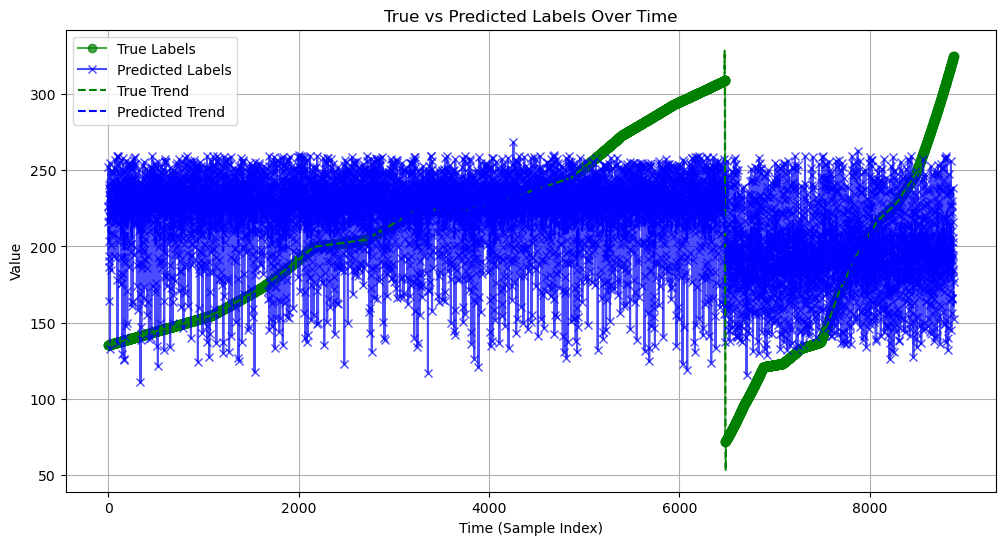

🏃 View run gru_regression at: http://localhost:5001/#/experiments/1/runs/384602691d1a4f89bd444c35ac00b148
🧪 View experiment at: http://localhost:5001/#/experiments/1
Test Metrics:
RMSE: 59.8175
MAE: 49.0359
R² Score: -0.1279
MAPE: 28.43%
Explained Variance Score: -0.0915


In [8]:
# Evaluate the model and visualize
metrics, all_preds, all_labels = evaluate_model(model, test_loader, device, run_id=run_id)

print(f"Test Metrics:")
print(f"RMSE: {metrics['rmse']:.4f}")
print(f"MAE: {metrics['mae']:.4f}")
print(f"R² Score: {metrics['r2']:.4f}")
print(f"MAPE: {metrics['mape']:.2f}%")
print(f"Explained Variance Score: {metrics['explained_variance_score']:.4f}")

### LSTMRegressor

Epoch 1/200, Train Loss: 43433.2659, Val Loss: 35898.1046
Epoch 2/200, Train Loss: 32613.3825, Val Loss: 27653.7156
Epoch 3/200, Train Loss: 25229.8068, Val Loss: 21309.9581
Epoch 4/200, Train Loss: 19475.0979, Val Loss: 16353.9143
Epoch 5/200, Train Loss: 14975.7287, Val Loss: 12530.1232
Epoch 6/200, Train Loss: 11515.0565, Val Loss: 9631.2205
Epoch 7/200, Train Loss: 8911.7041, Val Loss: 7505.1447
Epoch 8/200, Train Loss: 7010.3148, Val Loss: 5994.2761
Epoch 9/200, Train Loss: 5651.7589, Val Loss: 4821.6535
Epoch 10/200, Train Loss: 4197.7901, Val Loss: 3304.1458
Epoch 11/200, Train Loss: 3008.3535, Val Loss: 2403.7127
Epoch 12/200, Train Loss: 2186.2612, Val Loss: 1738.7426
Epoch 13/200, Train Loss: 1593.6506, Val Loss: 1286.8770
Epoch 14/200, Train Loss: 1184.2799, Val Loss: 995.3841
Epoch 15/200, Train Loss: 910.0313, Val Loss: 767.0272
Epoch 16/200, Train Loss: 708.9231, Val Loss: 623.1289
Epoch 17/200, Train Loss: 565.5846, Val Loss: 520.0892
Epoch 18/200, Train Loss: 467.3222, 

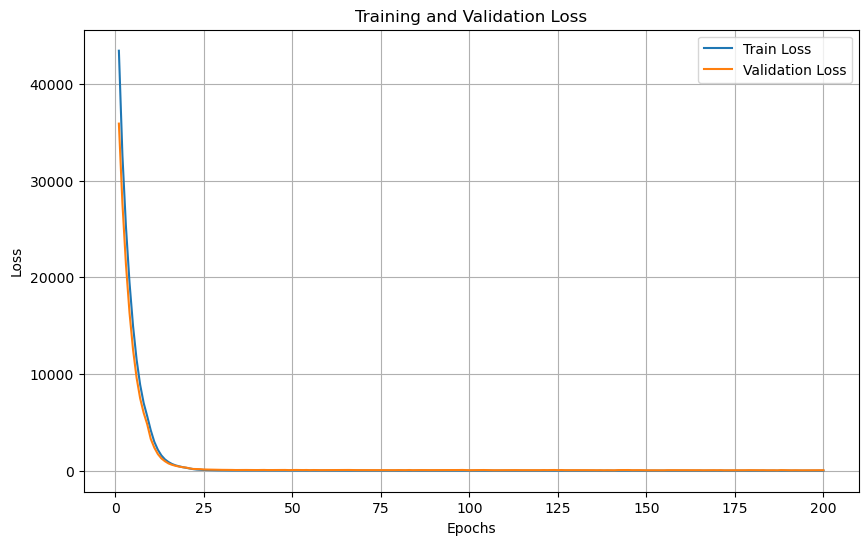

Train ended.


In [10]:

model = LSTMRegressor(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, output_size=output_size)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_model(model, train_loader, val_loader, criterion, optimizer, device, epochs=200)

print("Train ended.")

Evaluation Metrics:
RMSE: 19.6505
MAE: 17.2016
R² Score: 0.8783
MAPE: 9.69%
Explained Variance Score: 0.9148


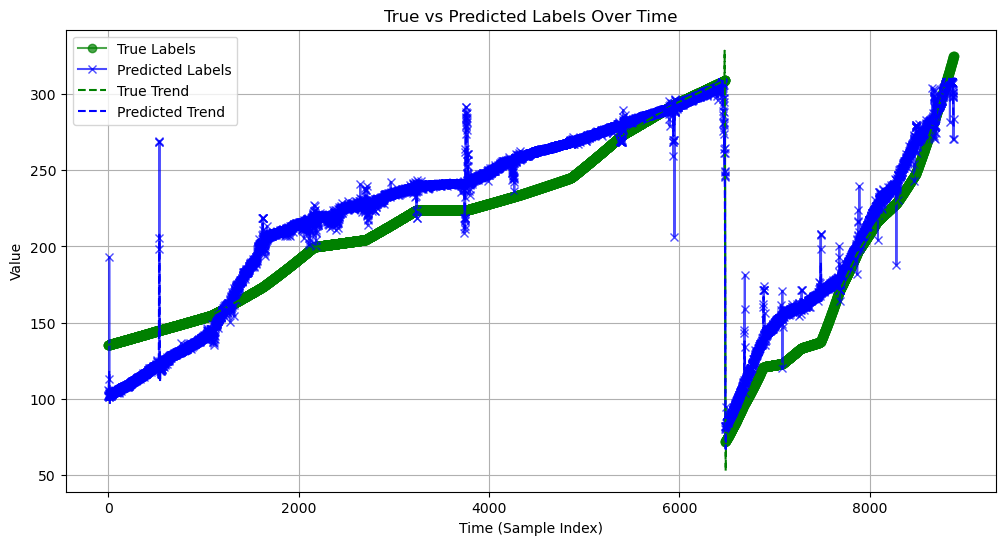

Test Metrics:
RMSE: 19.6505
MAE: 17.2016
R² Score: 0.8783
MAPE: 9.69%
Explained Variance Score: 0.9148


In [11]:
# Evaluate the model and visualize
metrics, all_preds, all_labels = evaluate_model(model, test_loader, device)

# 출력된 평가 지표 확인
print(f"Test Metrics:")
print(f"RMSE: {metrics['RMSE']:.4f}")
print(f"MAE: {metrics['MAE']:.4f}")
print(f"R² Score: {metrics['R2 Score']:.4f}")
print(f"MAPE: {metrics['MAPE']:.2f}%")
print(f"Explained Variance Score: {metrics['Explained Variance Score']:.4f}")

### Numpy 입력 모델들용 전처리

In [7]:
from utils import prepare_data
from sklearn.preprocessing import StandardScaler
from train import evaluate_model_ML, evaluate_model_ML_s
X_train, y_train = prepare_data(train_loader)
X_val, y_val = prepare_data(val_loader)
X_test, y_test = prepare_data(test_loader)

# # 데이터 스케일링 (Train 데이터로만 fit)
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_val_scaled = scaler.transform(X_val)
# X_test_scaled = scaler.transform(X_test)



### SVR

2024/12/27 11:28:49 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpybw90cvw/model, flavor: python_function). Fall back to return ['cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 
2024/12/27 11:28:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run support_vector_regressor at: http://localhost:5001/#/experiments/1/runs/9e5ffc6651434deaac47295c2950a64e
🧪 View experiment at: http://localhost:5001/#/experiments/1


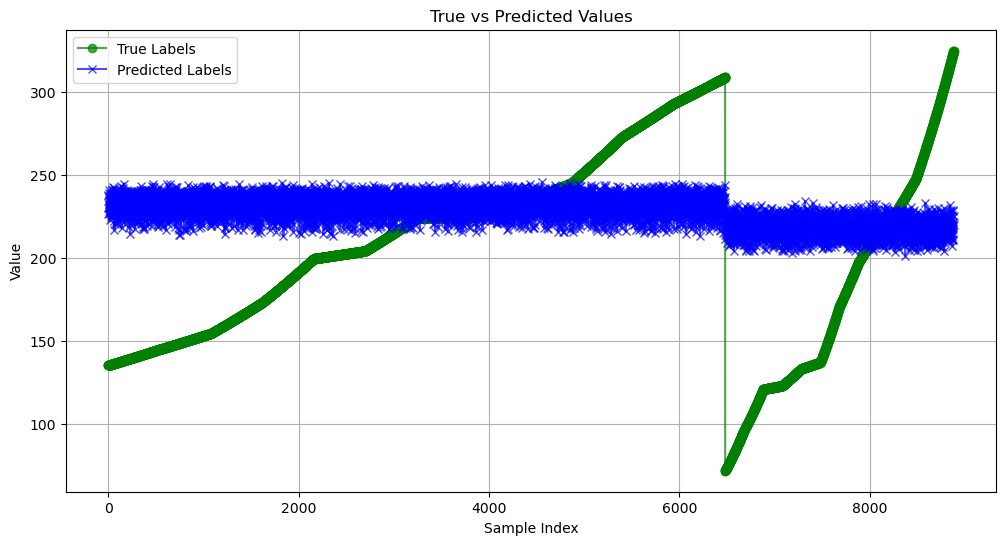

🏃 View run support_vector_regressor at: http://localhost:5001/#/experiments/1/runs/9e5ffc6651434deaac47295c2950a64e
🧪 View experiment at: http://localhost:5001/#/experiments/1
Test Metrics:
RMSE: 59.6586
MAE: 48.4923
R² Score: -0.1219
MAPE: 30.08%
Explained Variance Score: 0.0387


In [8]:
svr = SVRRegressor(kernel='rbf', C=1.0, epsilon=0.1)
X_train_scaled = svr.preprocessor.fit_transform(X_train)
svr.fit(X_train_scaled, y_train)
# svr.preprocessor.scaler = scaler
run_id = svr.save("model.pkl", "preprocessor.pkl")

metrics, all_preds, all_labels = evaluate_model_ML(svr, X_test, y_test, run_id)
print(f"Test Metrics:")
print(f"RMSE: {metrics['rmse']:.4f}")
print(f"MAE: {metrics['mae']:.4f}")
print(f"R² Score: {metrics['r2']:.4f}")
print(f"MAPE: {metrics['mape']:.2f}%")
print(f"Explained Variance Score: {metrics['explained_variance_score']:.4f}")

### RFR

2024/12/27 11:30:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run random_forest_regressor at: http://localhost:5001/#/experiments/1/runs/fe39c89dff1146189a6bbe5a2c553f1b
🧪 View experiment at: http://localhost:5001/#/experiments/1


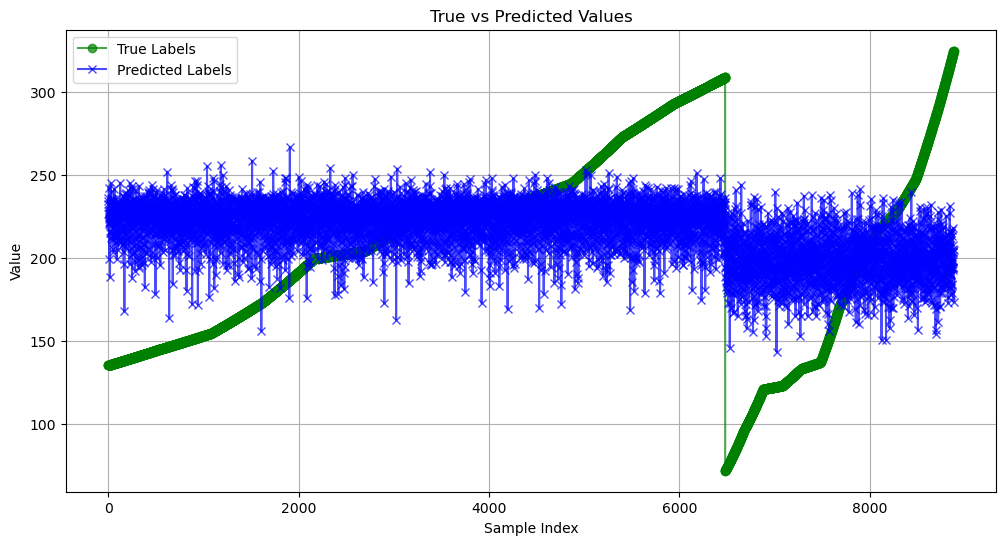

🏃 View run random_forest_regressor at: http://localhost:5001/#/experiments/1/runs/fe39c89dff1146189a6bbe5a2c553f1b
🧪 View experiment at: http://localhost:5001/#/experiments/1
Test Metrics:
RMSE: 56.5526
MAE: 46.4928
R² Score: -0.0081
MAPE: 27.37%
Explained Variance Score: 0.0277


In [9]:
RFR = RFRRegressor(n_estimators=100, max_depth=10, random_state=42)
RFR.fit(X_train, y_train)
run_id = RFR.save("model.pkl", "preprocessor.pkl")

metrics, all_preds, all_labels = evaluate_model_ML(RFR, X_test, y_test, run_id)
print(f"Test Metrics:")
print(f"RMSE: {metrics['rmse']:.4f}")
print(f"MAE: {metrics['mae']:.4f}")
print(f"R² Score: {metrics['r2']:.4f}")
print(f"MAPE: {metrics['mape']:.2f}%")
print(f"Explained Variance Score: {metrics['explained_variance_score']:.4f}")

### Catboost

0:	learn: 59.2114727	test: 57.3145600	best: 57.3145600 (0)	total: 15.9ms	remaining: 31.7s
1:	learn: 59.1874324	test: 57.2934146	best: 57.2934146 (1)	total: 30.2ms	remaining: 30.2s
2:	learn: 59.1688872	test: 57.2795087	best: 57.2795087 (2)	total: 44.3ms	remaining: 29.5s
3:	learn: 59.1519734	test: 57.2631943	best: 57.2631943 (3)	total: 57.7ms	remaining: 28.8s
4:	learn: 59.1306704	test: 57.2454412	best: 57.2454412 (4)	total: 71.3ms	remaining: 28.5s
5:	learn: 59.1125900	test: 57.2323520	best: 57.2323520 (5)	total: 85ms	remaining: 28.3s
6:	learn: 59.0964287	test: 57.2177089	best: 57.2177089 (6)	total: 98.4ms	remaining: 28s
7:	learn: 59.0795260	test: 57.2061587	best: 57.2061587 (7)	total: 112ms	remaining: 27.9s
8:	learn: 59.0643301	test: 57.1941080	best: 57.1941080 (8)	total: 125ms	remaining: 27.8s
9:	learn: 59.0464265	test: 57.1809933	best: 57.1809933 (9)	total: 139ms	remaining: 27.7s
10:	learn: 59.0301708	test: 57.1685354	best: 57.1685354 (10)	total: 152ms	remaining: 27.6s
11:	learn: 59.01

2024/12/27 11:09:12 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpbhlaxfdr/model, flavor: python_function). Fall back to return ['cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 
2024/12/27 11:09:12 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run catboost at: http://localhost:5001/#/experiments/1/runs/1a362ab374e245af87f85e6eeaf29f4e
🧪 View experiment at: http://localhost:5001/#/experiments/1


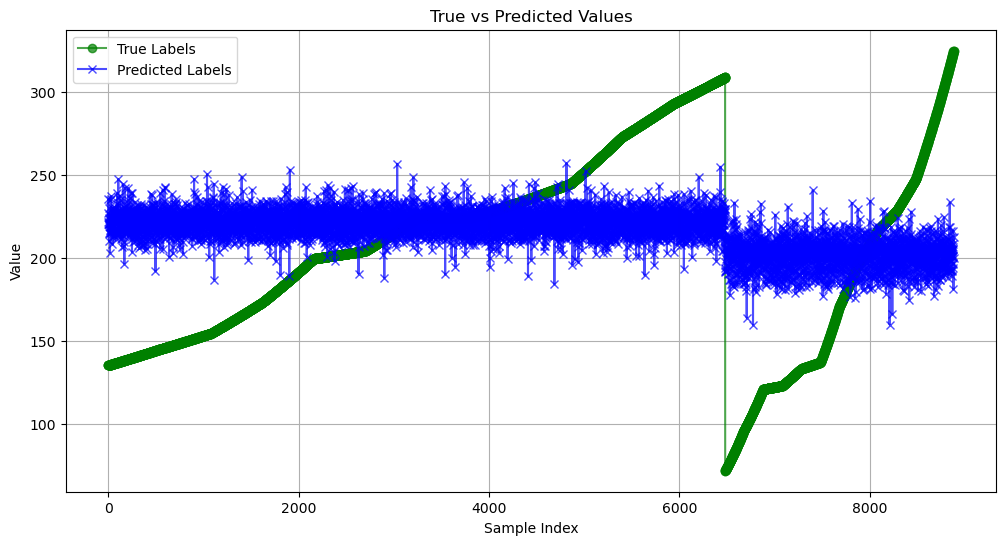

🏃 View run catboost at: http://localhost:5001/#/experiments/1/runs/1a362ab374e245af87f85e6eeaf29f4e
🧪 View experiment at: http://localhost:5001/#/experiments/1
Test Metrics:
RMSE: 55.9568
MAE: 45.9376
R² Score: 0.0130
MAPE: 27.22%
Explained Variance Score: 0.0480


In [12]:
catboost_model = CatboostRegressor(
    iterations=2000,         # 학습 반복 횟수
    learning_rate=0.01,     # 학습률
    depth=8,                # 트리 깊이
    loss_function='RMSE',   # 손실 함수
    task_type="GPU" if torch.cuda.is_available() else "CPU",  # GPU 사용 여부
    verbose=100             # 학습 로그 출력
)


catboost_model.fit(
    X_train_scaled, 
    y_train, 
    eval_set=(X_test_scaled, y_test), 
    verbose=True
)
run_id = catboost_model.save("model.pkl", "preprocessor.pkl")

metrics, all_preds, all_labels = evaluate_model_ML_s(catboost_model, X_test_scaled, y_test, run_id)
print(f"Test Metrics:")
print(f"RMSE: {metrics['rmse']:.4f}")
print(f"MAE: {metrics['mae']:.4f}")
print(f"R² Score: {metrics['r2']:.4f}")
print(f"MAPE: {metrics['mape']:.2f}%")
print(f"Explained Variance Score: {metrics['explained_variance_score']:.4f}")

### XGBRegressor

[0]	validation_0-rmse:57.30134


/home/scar/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [11:09:13] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "task_type" } are not used.

  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:56.26612
[200]	validation_0-rmse:56.59740
[300]	validation_0-rmse:57.09881
[400]	validation_0-rmse:57.54633
[500]	validation_0-rmse:58.06515
[600]	validation_0-rmse:58.61605
[700]	validation_0-rmse:59.24760
[800]	validation_0-rmse:59.81482
[900]	validation_0-rmse:60.35464
[1000]	validation_0-rmse:60.88473
[1100]	validation_0-rmse:61.36740
[1200]	validation_0-rmse:61.81275
[1300]	validation_0-rmse:62.36508
[1400]	validation_0-rmse:62.87934
[1500]	validation_0-rmse:63.35142
[1600]	validation_0-rmse:63.76442
[1700]	validation_0-rmse:64.17310
[1800]	validation_0-rmse:64.46756
[1900]	validation_0-rmse:64.85362
[1999]	validation_0-rmse:65.24223


2024/12/27 11:09:27 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run catboost at: http://localhost:5001/#/experiments/1/runs/2b1c0655a7a449599e6063ecf47dc847
🧪 View experiment at: http://localhost:5001/#/experiments/1


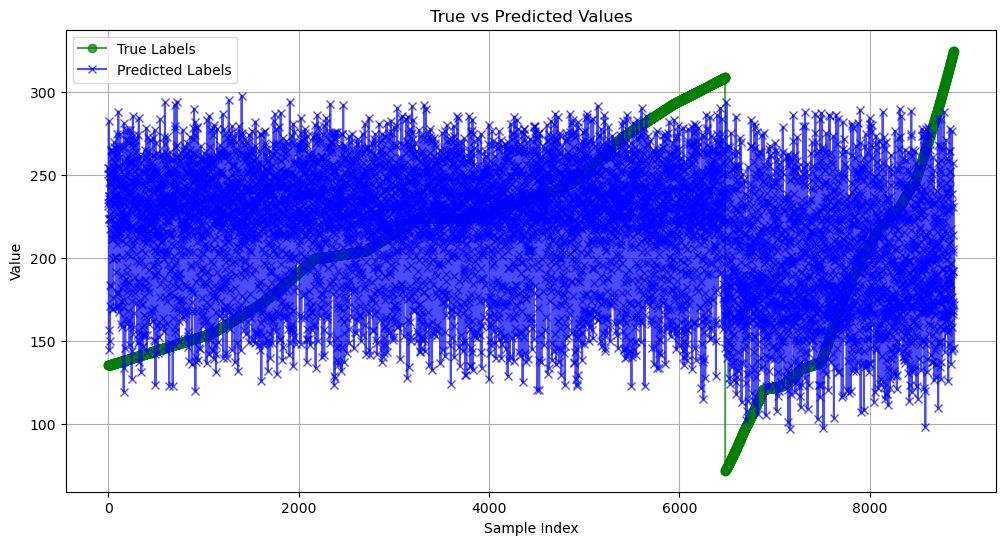

🏃 View run catboost at: http://localhost:5001/#/experiments/1/runs/2b1c0655a7a449599e6063ecf47dc847
🧪 View experiment at: http://localhost:5001/#/experiments/1
Test Metrics:
RMSE: 65.2422
MAE: 53.2980
R² Score: -0.3417
MAPE: 30.35%
Explained Variance Score: -0.3107


In [13]:

# XGBoost 모델 설정
xgb_model = XGboostRegressor(
    n_estimators=2000,      # 학습 반복 횟수 (trees)
    learning_rate=0.01,     # 학습률
    max_depth=8,            # 트리 깊이
    objective='reg:squarederror',  # 손실 함수 (회귀 문제)
    eval_metric="rmse",     # RMSE 평가 지표 설정
    task_type="GPU" if torch.cuda.is_available() else "CPU",  # GPU/CPU 자동 선택
    verbosity=1             # 학습 로그 출력
)

# 학습
xgb_model.fit(
    X_train_scaled, 
    y_train, 
    eval_set=[(X_test_scaled, y_test)], 
    verbose=100
)
run_id = xgb_model.save("model.pkl", "preprocessor.pkl")

metrics, all_preds, all_labels = evaluate_model_ML_s(xgb_model, X_test_scaled, y_test, run_id)
print(f"Test Metrics:")
print(f"RMSE: {metrics['rmse']:.4f}")
print(f"MAE: {metrics['mae']:.4f}")
print(f"R² Score: {metrics['r2']:.4f}")
print(f"MAPE: {metrics['mape']:.2f}%")
print(f"Explained Variance Score: {metrics['explained_variance_score']:.4f}")